In [1]:
options(tidyverse.quiet = TRUE) 
library(tidyverse, warn.conflicts = FALSE)

library(badr)
load_julia_package()

Loaded julia package 'bad' successfully.



In [2]:
p0    <- .2
alpha <- .05
p1    <- .4
beta  <- .2
mcr   <- .3

prior <- (0.2*Beta(1, 1) + 0.8*Beta_mu_sd(.35, .1) ) <= 0.7

In [11]:
design <- Problem(
        minimise( SampleSize(prior) ),
        Power(prior %|% p0)  <= alpha,
        Power(prior >= mcr) >= 1 - beta,
        label = 'pragmatic EP design',
        unimodal = TRUE # need to set this option since adapted design would not be unimodal else!
    ) %>%
    optimise_design(timelimit = 600L)

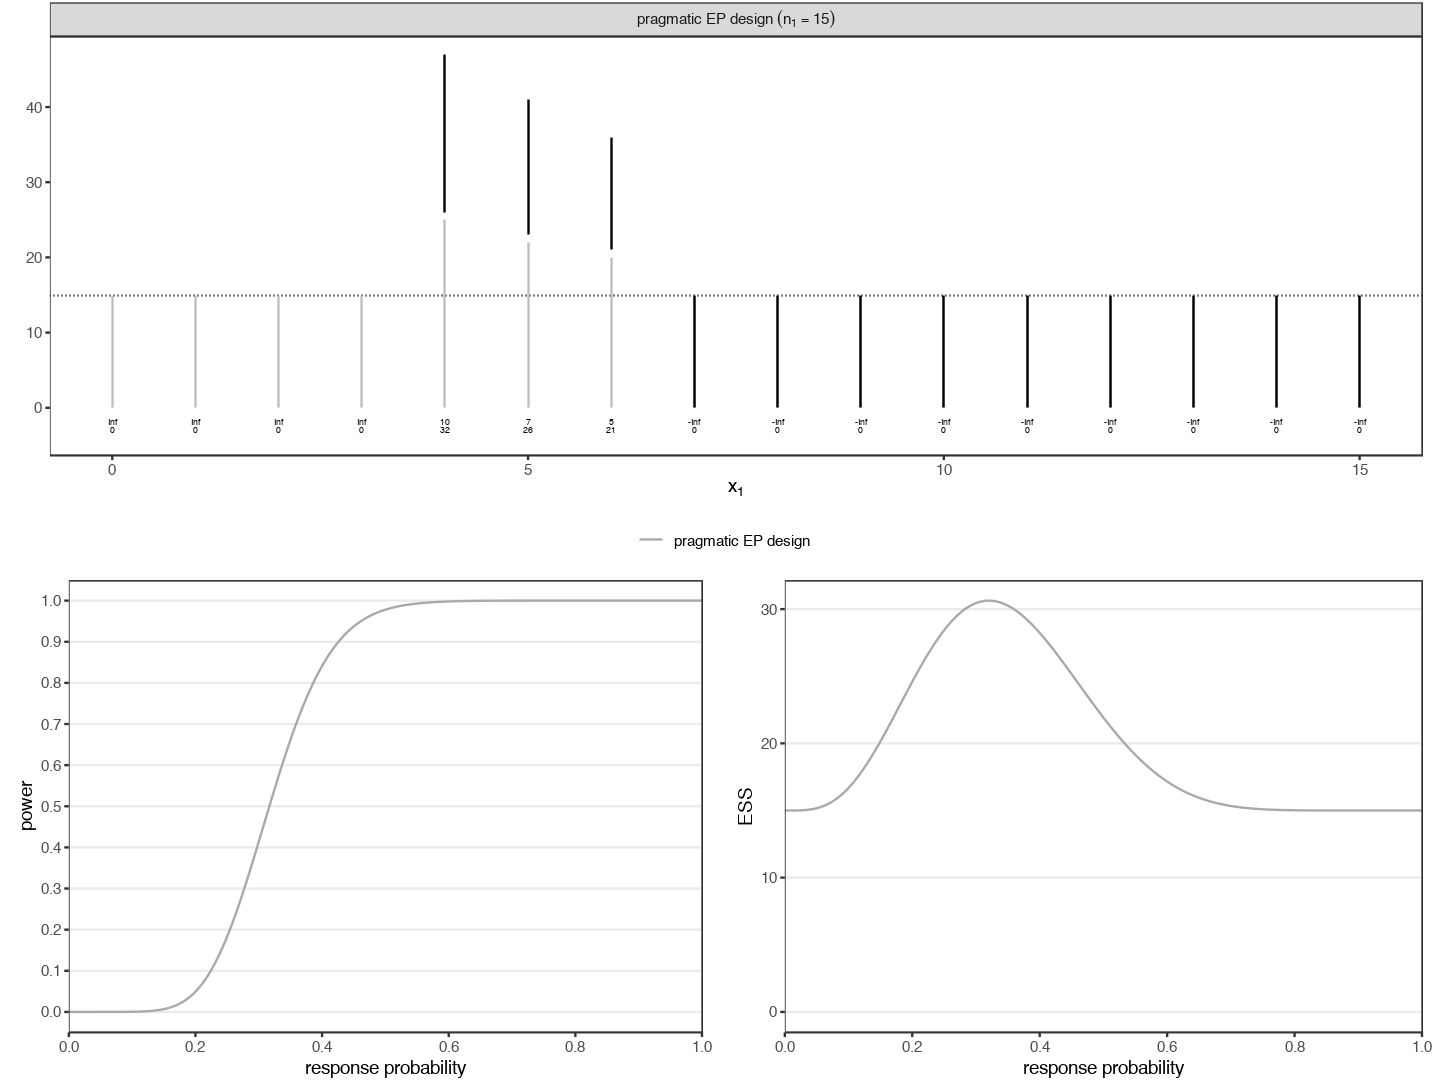

In [12]:
options(repr.plot.width = 12, repr.plot.height = 9)


plt_design <- plot_compare_designs(design)

plt_design

In [8]:
ggsave("unplanned-adaptations-base-design.pdf", width = 7, height = 7)

In [13]:
prior_modified <- (0.2*Beta(1,1) + 0.8*update(Beta_mu_sd(.35, .1), 6, 20)) <= 0.7

observations_stage_one <- c(3, 7)

In [15]:
partial_adapted_design <- adapt(design, prior_modified, observations_stage_one, timelimit = 1000L)

partial_adapted_design

[[1]]
 [1]  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26

[[2]]
 [1]  0  0  0 43 50 39 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

[[3]]
 [1]  Inf  Inf  Inf   13   14   10    6 -Inf -Inf -Inf -Inf -Inf -Inf -Inf -Inf
[16] -Inf -Inf -Inf -Inf -Inf -Inf -Inf -Inf -Inf

attr(,"class")
[1] "JuliaTuple"

In [ ]:
tbl_compare_sample_size_functions <- bind_rows(
    tibble(
        label = 'modified design',
        x1 = partial_adapted_design[[1]],
        `x1/n1` = x1 / max(x1),
        n2 = partial_adapted_design[[2]],
        n  = n2 + max(x1),
        c2 = partial_adapted_design[[3]]
    ),
    as_tibble(design) %>% select(label, `x1/n1`, n, c2)
)

In [ ]:
ggplot(tbl_compare_sample_size_functions) +
    aes(`x1/n1`, n) +
    geom_line(aes(linetype = label)) +
    geom_point() +
    coord_cartesian(ylim = c(0, 75)) +
    scale_linetype('') +
    theme_bw() +
    theme(legend.position = 'top')

In [ ]:
ggsave("unplanned-adaptations-adapted-sample-size-function-comparison.pdf", width = 7, height = 7)

In [ ]:
.6*7